In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

# Display the first few rows and column names of each dataset
print("Train DataFrame:")
print(train_df.head())
print(train_df.columns)

print("\nTest DataFrame:")
print(test_df.head())
print(test_df.columns)

print("\nGender Submission DataFrame:")
print(gender_submission_df.head())
print(gender_submission_df.columns)


Train DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [3]:
# Summary statistics and missing values for train dataset
print("Train DataFrame Summary Statistics:")
print(train_df.describe(include='all'))

print("\nMissing Values in Train DataFrame:")
print(train_df.isnull().sum())

# Summary statistics and missing values for test dataset
print("\nTest DataFrame Summary Statistics:")
print(test_df.describe(include='all'))

print("\nMissing Values in Test DataFrame:")
print(test_df.isnull().sum())

# Summary statistics and missing values for gender_submission dataset
print("\nGender Submission DataFrame Summary Statistics:")
print(gender_submission_df.describe(include='all'))

print("\nMissing Values in Gender Submission DataFrame:")
print(gender_submission_df.isnull().sum())


Train DataFrame Summary Statistics:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       Si

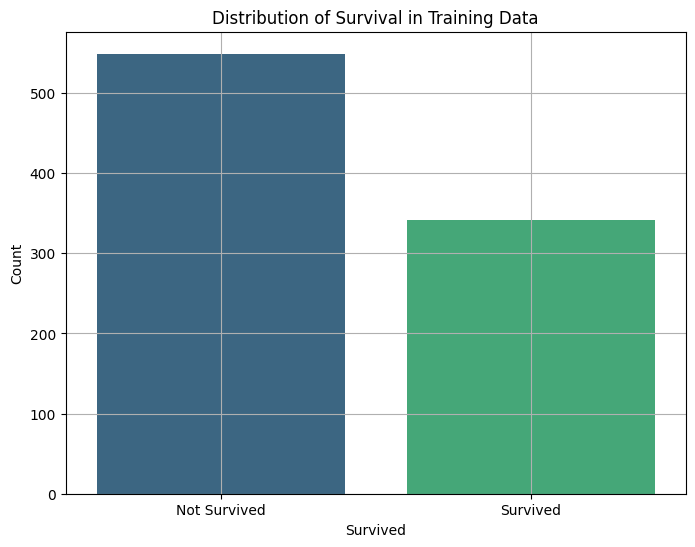

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable 'Survived'
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Survived', palette='viridis')
plt.title('Distribution of Survival in Training Data')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

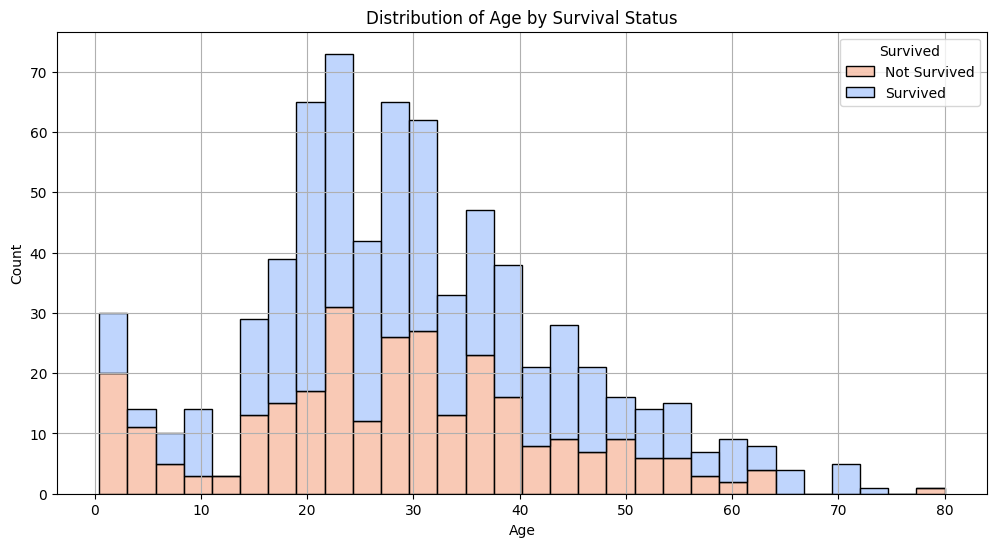

In [5]:
# Plot the distribution of Age by Survival Status
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', palette='coolwarm', bins=30)
plt.title('Distribution of Age by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.grid(True)
plt.show()


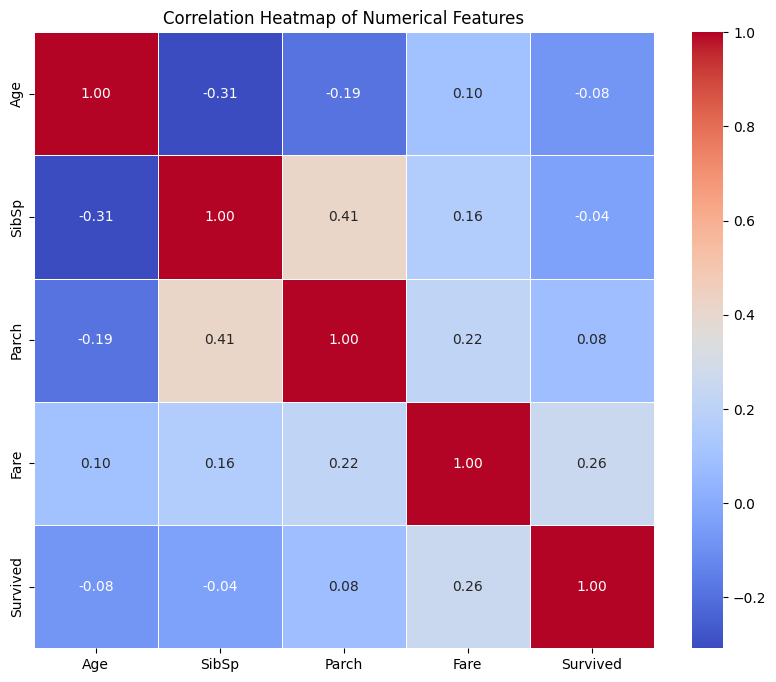

In [6]:
# Calculate the correlation matrix for numerical features
correlation_matrix = train_df[['Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


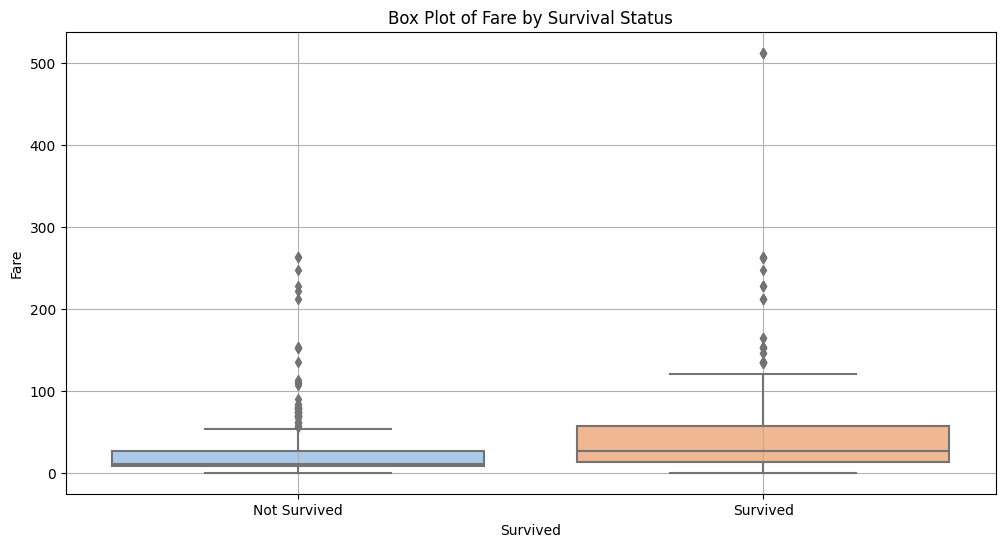

In [7]:
# Box plot of Fare by Survival Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='Survived', y='Fare', palette='pastel')
plt.title('Box Plot of Fare by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

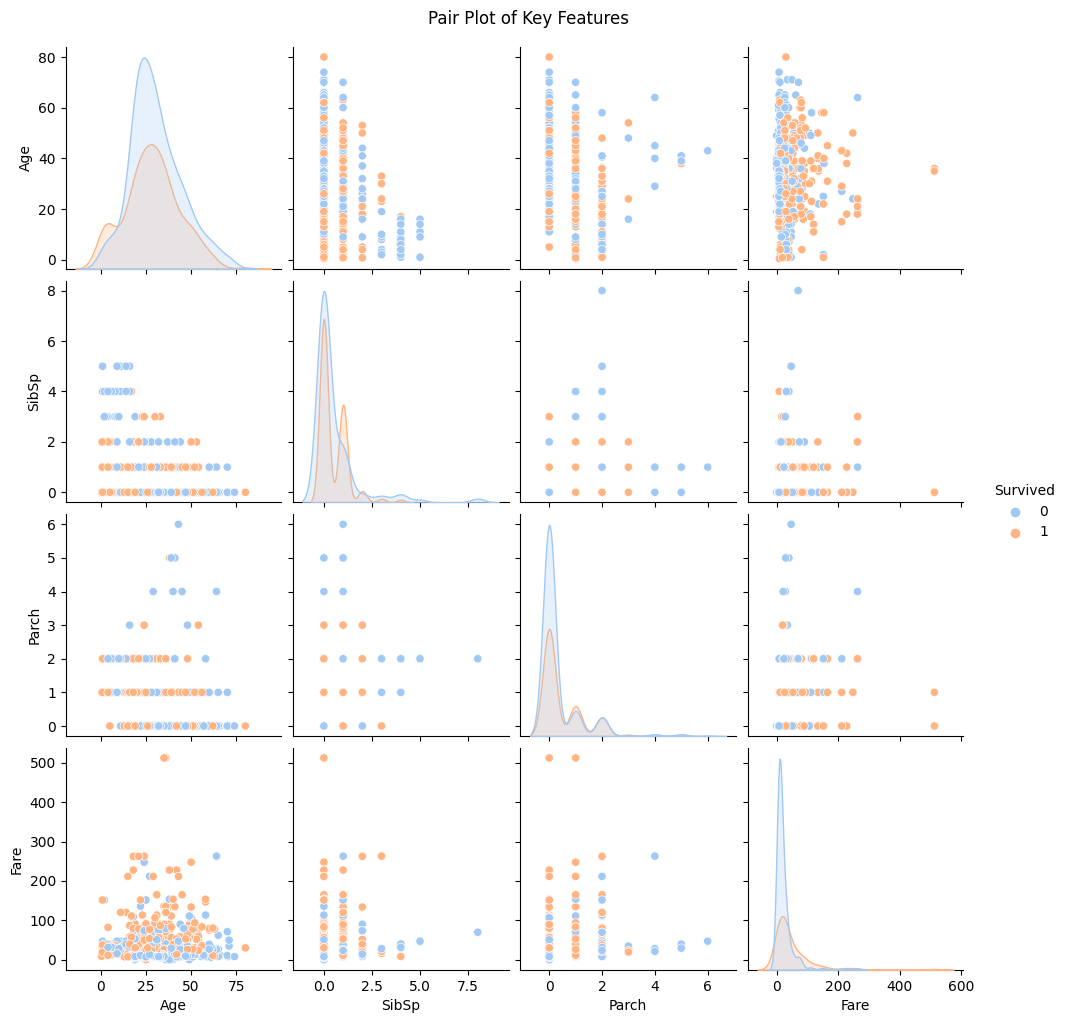

In [8]:
# Plot pair plot for key features
sns.pairplot(train_df[['Age', 'SibSp', 'Parch', 'Fare', 'Survived']], hue='Survived', palette='pastel')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()


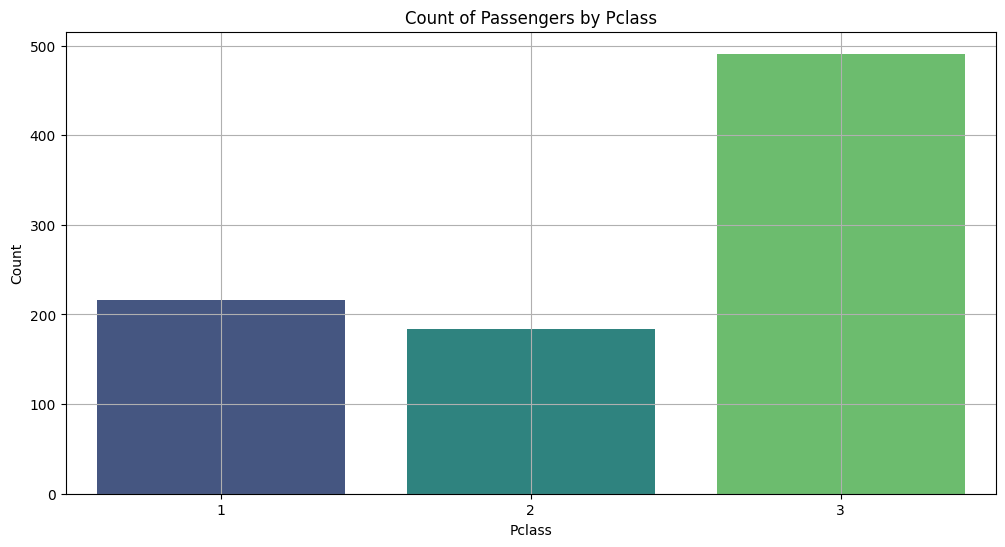

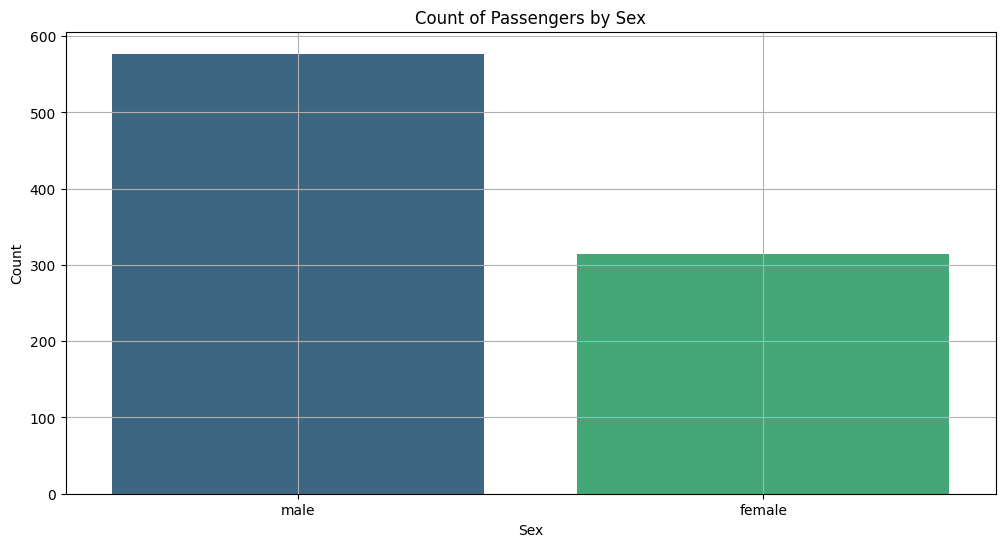

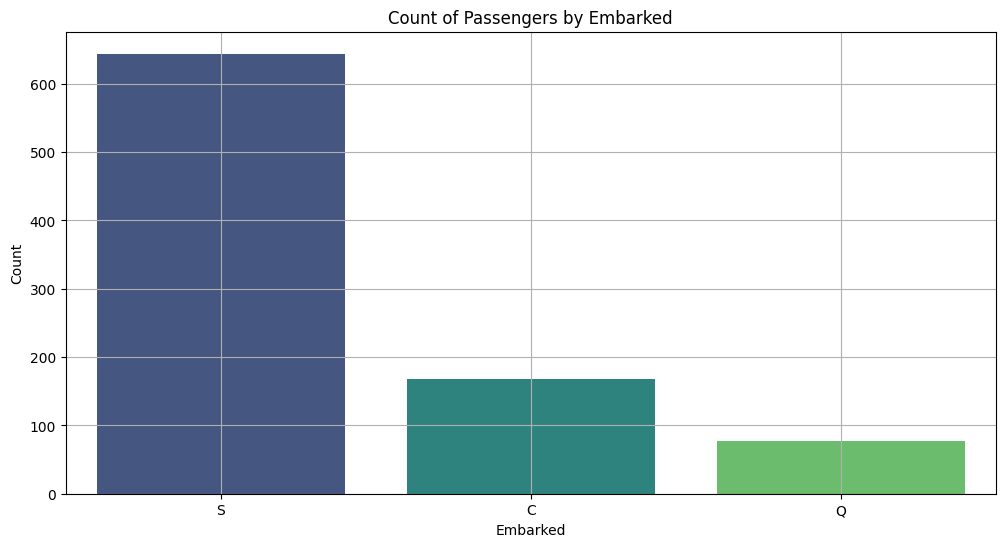

In [9]:
# Count plot of Pclass
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='Pclass', palette='viridis')
plt.title('Count of Passengers by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Count plot of Sex
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='Sex', palette='viridis')
plt.title('Count of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Count plot of Embarked
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='Embarked', palette='viridis')
plt.title('Count of Passengers by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.grid(True)
plt.show()


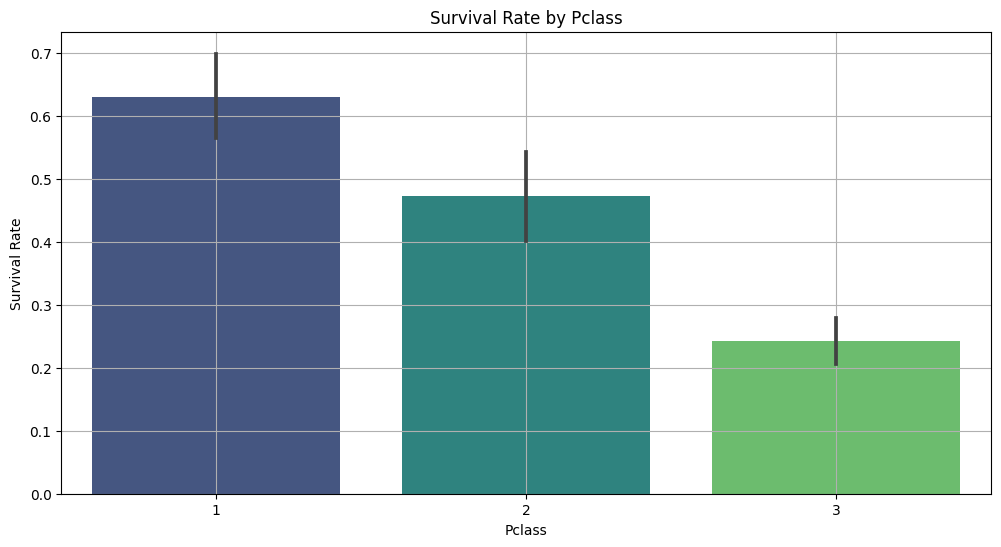

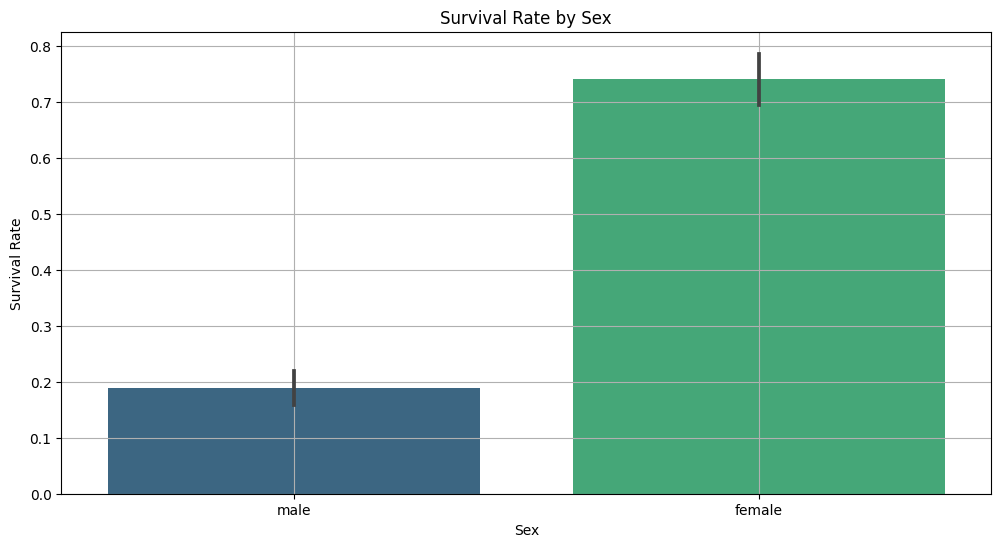

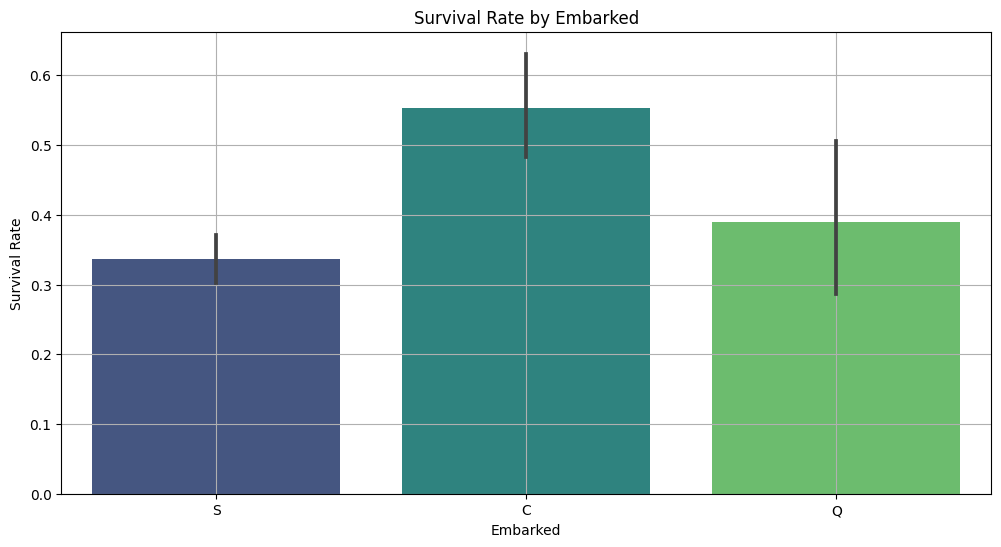

In [10]:
# Survival rate by Pclass
plt.figure(figsize=(12, 6))
sns.barplot(data=train_df, x='Pclass', y='Survived', palette='viridis')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

# Survival rate by Sex
plt.figure(figsize=(12, 6))
sns.barplot(data=train_df, x='Sex', y='Survived', palette='viridis')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

# Survival rate by Embarked
plt.figure(figsize=(12, 6))
sns.barplot(data=train_df, x='Embarked', y='Survived', palette='viridis')
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()


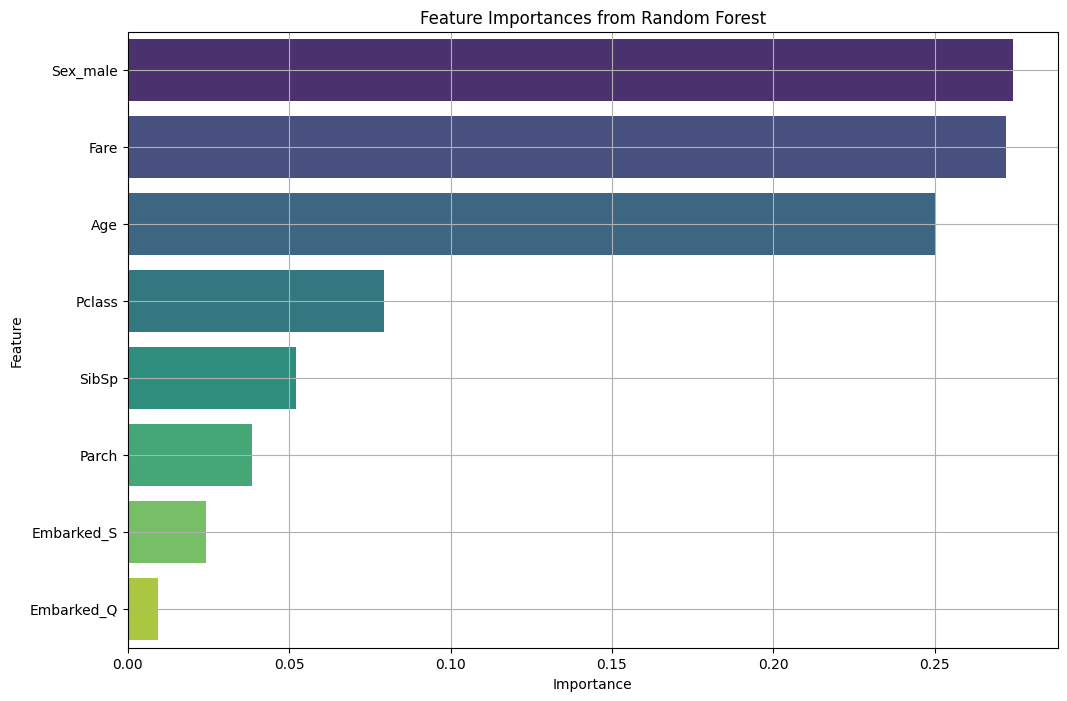

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separate features and target
X = train_df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
X = pd.get_dummies(X, drop_first=True)  # Convert categorical features to dummy variables
y = train_df['Survived']

# Handle missing values
X.fillna(X.median(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Check the imputed and scaled data
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Imputed Data:")
print(X_imputed_df.head())

print("\nScaled Data:")
print(X_scaled_df.head())


Imputed Data:
   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0     3.0  22.0    1.0    0.0   7.2500       1.0         0.0         1.0
1     1.0  38.0    1.0    0.0  71.2833       0.0         0.0         0.0
2     3.0  26.0    0.0    0.0   7.9250       0.0         0.0         1.0
3     1.0  35.0    1.0    0.0  53.1000       0.0         0.0         1.0
4     3.0  35.0    0.0    0.0   8.0500       1.0         0.0         1.0

Scaled Data:
     Pclass       Age     SibSp     Parch      Fare  Sex_male  Embarked_Q  \
0  0.827377 -0.565736  0.432793 -0.473674 -0.502445  0.737695   -0.307562   
1 -1.566107  0.663861  0.432793 -0.473674  0.786845 -1.355574   -0.307562   
2  0.827377 -0.258337 -0.474545 -0.473674 -0.488854 -1.355574   -0.307562   
3 -1.566107  0.433312  0.432793 -0.473674  0.420730 -1.355574   -0.307562   
4  0.827377  0.433312 -0.474545 -0.473674 -0.486337  0.737695   -0.307562   

   Embarked_S  
0    0.619306  
1   -1.614710  
2    0.619306  
3    0.

In [13]:
from sklearn.model_selection import cross_val_score

# Define a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:")
print(cv_scores)

print("\nMean Cross-Validation Score:")
print(cv_scores.mean())


Cross-Validation Scores:
[0.79329609 0.81460674 0.84831461 0.7752809  0.8258427 ]

Mean Cross-Validation Score:
0.8114682066411399


In [14]:
# Prepare test data
X_test_df = test_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
X_test_df = pd.get_dummies(X_test_df, drop_first=True)
X_test_df.fillna(X_test_df.median(), inplace=True)

# Impute and scale test data
X_test_imputed = imputer.transform(X_test_df)
X_test_scaled = scaler.transform(X_test_imputed)

# Train the model on the entire training set
model.fit(X_scaled, y)

# Make predictions on the test data
test_predictions = model.predict(X_test_scaled)

# Create a DataFrame for the submission file
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_predictions})

# Save the submission file
submission_df.to_csv('/kaggle/working/titanic_submission.csv', index=False)

print("Submission file created at '/kaggle/working/titanic_submission.csv'")


Submission file created at '/kaggle/working/titanic_submission.csv'
